

# Project 3: Mayfly Model by Adrian Campbell<a href="#Project-3:-Mayfly-Model-by-Adrian-Campbell" class="anchor-link">¶</a>

## Introduction<a href="#Introduction" class="anchor-link">¶</a>

A common field of interest in Mathematics is the prediction of changes
in populations over time across many species such as animals, insects,
and bacteria. In order to further explore this behavior population
models are used and one that will be explored today is the Mayfly Model.
The Mayfly Model is a linear growth rate model that outputs population
values between 0 and 1 and it is given by the following formula: \$\$y_n
= b(1-y\_{n-1})y\_{n-1}\$\$

<span class="mark">Why is the population between 0 and 1? How should we
interpret the values produced by this model?</span>

The current population is represented as \$\$y_n\$\$

<span class="mark">More accurately, \$y_n\$ represents the population at
time \$n\$.</span>

The growth rate is represented as \$\$b\$\$ and the population at a
previous time is represented as \$\$y\_{n-1}\$\$ With the aid of Python
code we will be analyzing the behavior of this equation for a variety of
different values of \$\$b\$\$ and \$\$y\$\$ over time.

<span class="mark">The readability of the above cell might be improved
by using in-line LaTeX (just a single \\\\\$ to open/close the equation)
instead of display style (a double \\\\\$\\\\\$ to open/close the
equation). For example, something like</span>

> <span class="mark">The current population is represented as \$y_n\$.
> The growth rate is represented as \$b\$.</span>

<span class="mark">Typically, I recommend using display style LaTeX when
presenting equations or relations, and inline style when introducing or
defining variables.</span>

## Creating the Mayfly Method<a href="#Creating-the-Mayfly-Method" class="anchor-link">¶</a>

First, we will be defining the Mayfly Model function below. What this
function is supposed to do is have three parameters which are
\$\$y_0\$\$ which represents the initial population at the start of time
\$\$b\$\$ which we defined in the introduction as the growth rate and
\$\$N\$\$ which represents time.

<span class="mark">To clarify, \$N\$ represents the number of time steps
over which we will model the population.</span>

After we put in the three parameters then what this method will do is
add the initial population to a list, and then input that initial
population which is represented as \$\$y\_{n-1}\$\$ in the mayfly
equation we defined in the introduction to get the next population value
and then add that population value to a list, and use that next
population value to find the population value after that. This whole
process will repeat N number of times. After that process is done then
the function will return a list of population values.

In \[1\]:

    def mayfly(y0,b,N):
        ylist = [y0] #List of population values
        for n in range(N): #Do a process N times
            y_old = ylist[-1] #A previous population value is equal to last element in list
            y_new = b*(1-y_old)*y_old #Population value based on Mayfly Model Equation
            ylist.append(y_new) #Add population to a list
        return ylist #Final list

<span class="mark">For readability, I recommend aligning the code
comments (when reasonable). Something like the following:</span>

> `def mayfly(y0,b,N):     ylist = [y0]                   #List of population values     for n in range(N):             #Do a process N times         y_old = ylist[-1]          #A previous population value is equal to last element in list         y_new = b*(1-y_old)*y_old  #Population value based on Mayfly Model Equation         ylist.append(y_new)        #Add population to a list     return ylist                   #Final list`

Now we will be seeing if our function works correctly so we will be
printing the function output which is the list and the list elements
which are different population values at various amount of times. Also,
we will see if it inputs the correct number of different populations
which is supposed to be equal to N+1. What will print is the population
and right next to the population is the time up until N.

In \[2\]:

    y0 = .2             # initial population
    b = 3.2             # growth rate
    N = 20              # number of time slices to model
    ylist = mayfly(y0,b,N)

In \[3\]:

    data = [ylist, [i for i in range(0,N+1)]]
    for popu, year in zip(*data):
        print(popu, year)

    0.2 0
    0.5120000000000001 1
    0.7995392 2
    0.512884056522752 3
    0.7994688034800593 4
    0.5130189943751091 5
    0.7994576185134749 6
    0.5130404310855622 7
    0.7994558309027288 8
    0.5130438570827403 9
    0.7994555449356961 10
    0.5130444051432489 11
    0.7994554991822681 12
    0.5130444928303957 13
    0.7994554918617529 14
    0.513044506860274 15
    0.7994554906904713 16
    0.5130445091050531 17
    0.7994554905030662 18
    0.5130445094642178 19
    0.7994554904730815 20

<span class="mark">I would recommend formatting the output to create two
labeled columns with aligned outputs.</span>

## Graphing the Mayfly Model<a href="#Graphing-the-Mayfly-Model" class="anchor-link">¶</a>

Next, we will use Python code to graph the results of the Mayfly Model
equation and be able to physically interact with the graph by adjusting
the growth rate and initial population values using sliders. That way,
we will be able to physically see how the graph looks at various growth
rates and various amount of initial population values over time.

In \[4\]:

    %matplotlib notebook

In \[7\]:

    from matplotlib.widgets import Slider  # import the Slider widget

    import numpy as np
    import matplotlib.pyplot as plt
    from math import pi

    b_min = 0    # the minimial value of the paramater b
    b_max = 4   # the maximal value of the paramater b
    b_init = b   # the value of the parameter b to be used initially, when the graph is created

    y_min = 0    # the minimial value of the paramater b
    y_max = 1   # the maximal value of the paramater b
    y_init = y0   # the value of the parameter b to be used initially, when the graph is created

    fig = plt.figure(figsize=(5,5))

    # first we create the general layount of the figure
    # with two axes objects: one for the plot of the function
    # and the other for the slider
    liss_ax = plt.axes([0.1, 0.2, 0.8, 0.65])
    b_slider_ax = plt.axes([0.1, 0.05, 0.7, 0.05])
    y_slider_ax = plt.axes([0.95, .2, 0.05, 0.65])



    # in plot_ax we plot the function with the initial value of the parameter a
    plt.axes(liss_ax) # select sin_ax
    plt.title('Mayfly model')
    ylist = mayfly(y0,b_init,N)
    liss_plot, = plt.plot(ylist, 'r')
    plt.xlim(0, N)
    plt.ylim(0, 1)

    plt.xlabel('Time')
    plt.ylabel('Population')

    b_slider = Slider(b_slider_ax,      # the axes object containing the slider
                      'b',            # the name of the slider parameter
                      b_min,          # minimal value of the parameter
                      b_max,          # maximal value of the parameter
                      valinit=b_init, # initial value of the parameter
                      orientation='vertical'
                     )
                     
    y_slider = Slider(y_slider_ax,      # the axes object containing the slider
                      'y0',            # the name of the slider parameter
                      y_min,          # minimal value of the parameter
                      y_max,          # maximal value of the parameter
                      valinit=y_init, # initial value of the parameter
                      orientation='vertical'
                     ) 


    # Next we define a function that will be executed each time the value
    # indicated by the slider changes. The variable of this function will
    # be assigned the value of the slider.
    def update(a):
        ylist = mayfly(y_slider.val,b_slider.val,N)
        liss_plot.set_ydata(ylist)
        fig.canvas.draw_idle()          # redraw the plot

    # the final step is to specify that the slider needs to
    # execute the above function when its value changes
    b_slider.on_changed(update)

    plt.show()

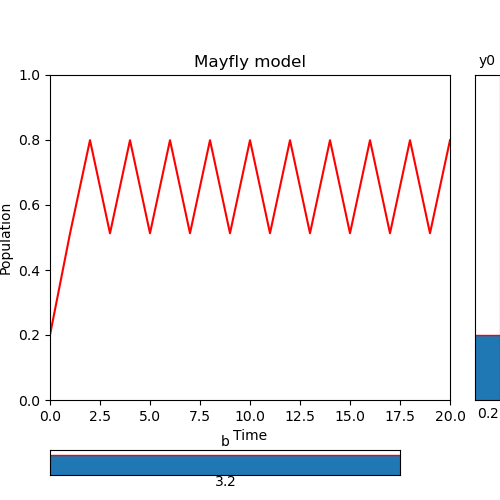

<span class="mark">The</span> `y0` <span class="mark">slider doesn't
seem to do anything. It looks like you are missing the line</span>
`y_slider.on_changed(update)` <span class="mark">to tell Python how to
update the graph based on the current</span> `y0` <span
class="mark">value.</span>

<span class="mark">Also, I recommend orienting the</span> `b` <span
class="mark">slider horizontally, since it is easier for the user to
slide along the longer of the two dimensions of the slider
rectangle.</span>

## Analysis<a href="#Analysis" class="anchor-link">¶</a>

Based on the Mayfly equation and the graph of the Mayfly equation there
are noticeable trends. First, one trend is when the inital population is
either exactly 0 or 1 no matter what the growth rate is the graph would
stay stagnant after a specific period of time even before the graph hits
N. Also, another noticeable trend is when the initial population is .5
the population is able to hit the peak population the most amount of
times but also the graph also declines at the fastest rates after the
graph hits the peak population. In addition, another noticeable trend is
the higher the initial population the more number of times the
population decreases over time.

<span class="mark">The interactive plot above is a useful tool for
exploring the behavior. For the report, I would suggest creating some
static figures (perhaps with subplots showing different parameter
values) that support the claims in the above analysis. The reader should
not be expected to perform this exploration themselves, but should be
guided through your discoveries.</span>

<span class="mark">Some further analysis would improve the
report.</span>

## Conclusion<a href="#Conclusion" class="anchor-link">¶</a>

In conclusion, population models are constantly used in Mathematics and
population models are used for endeavors such as predicting changes in
populations over time. For this project, we used the Mayfly model
equation and from the Mayfly model equation we were able to graph
population values over time using Python code. From the graph we were
able to see some noticeable trends:

-   When the inital population is either exactly 0 or 1 no matter what
    the growth rate is the graph would stay stagnant at a certain point
-   When the initial population is .5 the population is able to hit the
    peak population the most amount of times and also declines the
    fastest
-   The higher the initial population the more number of times the
    population decreases over time.

The Mayfly model is an example of how previous points of time and
various stimuli can affect a population over time and is an example of
why population models are studied so thoroughly in Mathematics.